In [2]:
!pip install transformers
!pip install langchain
!pip install langchain-huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
pandas-gbq 0.28.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2

In [4]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain_huggingface import HuggingFacePipeline
from langchain_core.prompts import PromptTemplate
from langchain.output_parsers import StructuredOutputParser, ResponseSchema

model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)

hf_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    do_sample=True,
    temperature=0.7,
    max_new_tokens=512,
)

llm = HuggingFacePipeline(pipeline=hf_pipeline)

schema = [
    ResponseSchema(name='fact_1', description='Fact 1 about the topic'),
    ResponseSchema(name='fact_2', description='Fact 2 about the topic'),
    ResponseSchema(name='fact_3', description='Fact 3 about the topic'),
]

parser = StructuredOutputParser.from_response_schemas(schema)

template = PromptTemplate(
    template="""
Give exactly 3 facts about {topic} in JSON format like this:

{{
  "fact_1": "Fact here...",
  "fact_2": "Fact here...",
  "fact_3": "Fact here..."
}}

{format_instruction}
""",
    input_variables=["topic"],
    partial_variables={"format_instruction": parser.get_format_instructions()}
)


chain = template | llm | parser

result = chain.invoke({'topic': 'black hole'})

print("\n✅ Final Parsed Output:")
print(result)


Device set to use cuda:0


OutputParserException: Got invalid return object. Expected key `fact_1` to be present, but got  and 
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 

# **Pydantic OUTPUT PARSE** 

What is get_format_instructions()?

It’s a method defined in many LangChain output parser classes that returns a string describing how the LLM should format its output.

Purpose:
To guide the LLM to return text in a specific format (like JSON, list, table, etc.) so that the parser can correctly read and process the result.

Where it's used:
With classes like:

StructuredOutputParser
PydanticOutputParser
ResponseSchema
OutputFixingParser

You call get_format_instructions() and inject its return value into the prompt to tell the model how to respond.

Why is this needed?

LLMs are flexible but not strict. Without clear format instructions, they may:

Return markdown, bullets, or random explanations.

Include extra fluff that breaks your parsing code.

So get_format_instructions() gives you automated, clear, formatting guidelines that match the parser’s expectations.




In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain_huggingface import HuggingFacePipeline
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import PydanticOutputParser
from pydantic import BaseModel,Field

model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)

hf_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    do_sample=True,
    temperature=0.7,
    max_new_tokens=512,
)

llm = HuggingFacePipeline(pipeline=hf_pipeline)

Class Person(BaseModel):
    name: str=Field(description='Name of the person')
    age: int= Field(gt=18,description='Age of the person')
    city: str= Field(description='Name of the city the person belong to')

parser = PydanticOutputParser(pydantic_object=Person)

template = PromptTemplate(
    template='Generate the name,age and city of a fictional {place} person \n{format_instruction}',
    input_variables=['place'],
    partial_variables={'format_instruction': parser.get_format_instruction()}
)

prompt =  template.invoke({'place':'indian'})

print(prompt)

result = model.invoke(prompt)

final_result = parser.parse(result.content)
print(final_result)


WHY USE THE parser.parse at the last

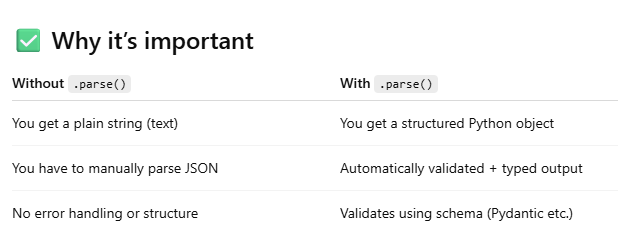

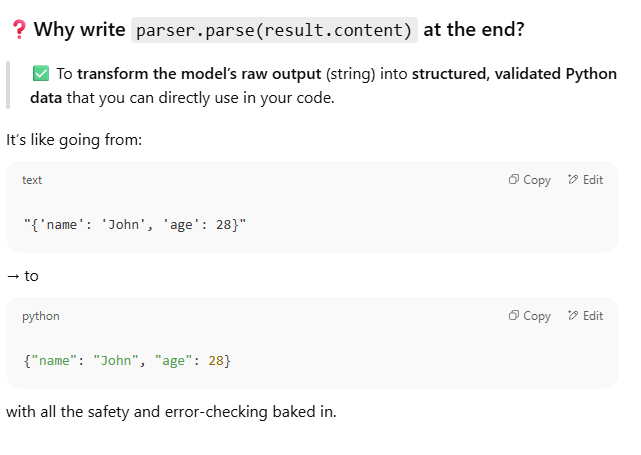

Results

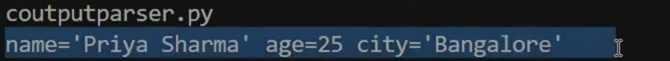

With print(prompt)

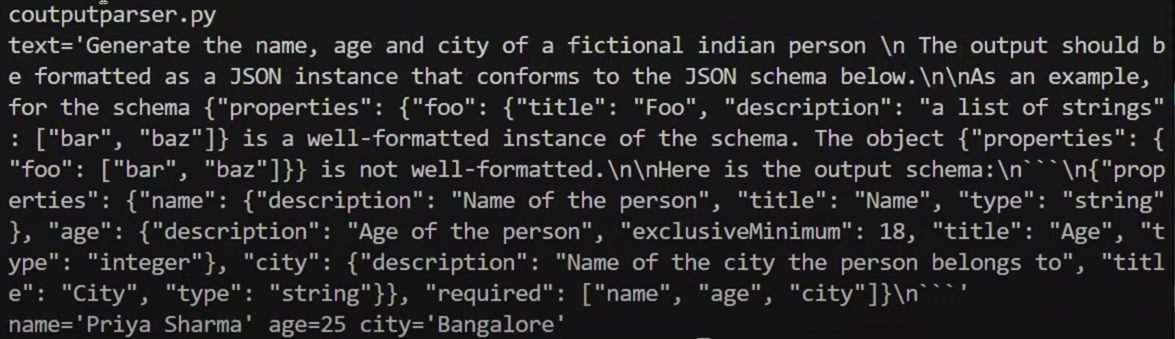